In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
data = pd.read_csv('../data/final_data.csv', header = 0)

In [ ]:
data.head()

,TARGET,X1_1,X1_2,X1_3,X2_1,X2_2,X2_3,X2_4,X2_5,X3_1,X3_2,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,...,X3963,X3964,X3965,X3966,X3967,X3968,X3969,X3970,X3971,X3972,X3973,X3974,X3975,X3976,X3977,X3978,X3979,X3980,X3981,X3982,X3983,X3984,X3985,X3986,X3987,X3988,X3989,X3990,X3991,X3992,X3993,X3994,X3995,X3996,X3997,X3998,X3999,X4000,X4001,X4002
0,0,0,0,0,0,0,0,0,0,1,0,3.94,3.939,-52.54,-52.79,-45.08,-44.48,-52.60,-47.00,-48.40,-55.55,-51.03,-52.11,-47.07,-54.85,-44.90,-50.29,-53.56,-45.41,-51.31,-50.70,-46.56,-55.01,-47.74,-43.18,-48.67,-47.51,-42.79,-44.85,-43.98,...,0.5,0.3,-25.1,-25.7,0.5,-25.8,-25.4,-26.1,-26.2,-26.9,-27.8,-27.6,0,0.8,0.1,1.0,0.4,0.6,0.6,0.0,-25.5,0.5,-25.3,-25.8,-26.1,-25.7,-26.5,-27.2,-27.8,-28.1,0,0.3,0.8,0.9,0.0,0.3,0.0,0.1,0.3,67.493827
1,0,1,0,0,0,0,0,1,0,0,1,4.26,3.978,-52.97,-52.21,-49.52,-45.10,-51.52,-48.10,-49.90,-52.69,-47.94,-60.89,-47.29,-55.13,-45.72,-49.24,-49.05,-48.90,-49.08,-54.93,-58.81,-46.18,-53.64,-49.68,-47.79,-53.41,-42.81,-46.91,-45.72,...,0.3,0.1,-26.8,-27.1,0.2,-27.1,-26.8,-27.2,-27.5,-28.3,-29.0,-29.1,0,0.3,0.0,0.3,0.4,0.1,0.5,0.0,-27.1,0.9,-26.9,-27.3,-27.5,-27.1,-27.7,-28.6,-29.4,-29.6,0,0.2,0.6,0.6,0.2,0.7,0.2,0.1,0.6,66.843621
2,0,1,0,0,0,0,0,1,0,0,1,4.27,3.975,-54.46,-54.32,-52.64,-47.31,-53.48,-51.88,-55.53,-47.36,-46.10,-50.08,-45.59,-53.86,-46.18,-46.00,-47.37,-46.51,-48.41,-48.84,-56.55,-45.50,-49.89,-51.25,-47.06,-46.22,-43.48,-47.45,-43.20,...,0.1,0.4,-26.7,-26.8,0.4,-27.0,-26.7,-27.0,-27.4,-28.2,-28.7,-28.7,0,0.5,0.2,0.3,0.3,0.1,0.4,0.3,-27.1,0.5,-26.8,-27.0,-27.3,-26.9,-27.6,-28.5,-28.9,-28.9,0,0.1,0.1,0.3,0.3,0.6,0.1,0.5,0.4,67.061486
3,0,0,0,0,0,1,0,0,0,0,1,4.26,3.968,-52.68,-55.81,-54.09,-46.33,-50.51,-44.86,-45.52,-51.31,-50.15,-50.94,-47.26,-46.94,-46.13,-53.20,-55.05,-47.46,-47.06,-49.81,-47.71,-46.89,-51.36,-48.00,-46.39,-48.36,-45.47,-46.61,-45.82,...,0.5,0.2,-25.9,-26.2,0.2,-26.6,-26.4,-26.7,-27.0,-27.8,-28.3,-28.2,0,1.1,0.4,1.2,0.2,0.0,0.5,0.4,-26.5,0.3,-26.3,-26.7,-27.1,-26.3,-27.2,-27.8,-28.6,-28.7,0,0.2,0.6,0.4,0.8,0.5,0.7,0.2,0.7,71.020576
4,0,1,0,0,0,0,0,1,0,0,1,4.26,3.957,-52.15,-50.34,-46.37,-49.90,-55.10,-47.11,-48.62,-48.32,-49.03,-52.38,-52.77,-52.15,-46.99,-54.61,-49.87,-47.68,-48.85,-44.25,-58.97,-47.53,-50.14,-44.33,-48.19,-49.73,-46.58,-43.98,-43.85,...,0.7,0.3,-24.4,-24.9,0.2,-25.0,-24.4,-25.1,-25.4,-26.0,-26.8,-26.4,0,0.7,0.1,0.6,0.7,0.4,0.3,0.2,-24.7,0.0,-24.6,-25.1,-25.2,-24.7,-25.5,-26.3,-27.0,-27.0,0,0.4,0.9,0.6,0.4,0.5,0.2,0.1,0.7,67.064391


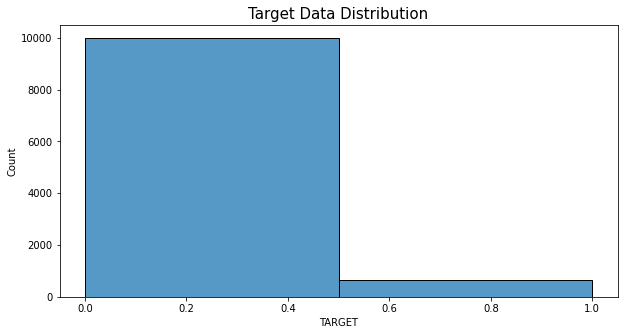

Target Label Counts
Counter({0: 10000, 1: 642})


In [ ]:
# Target Data Check
plt.figure(figsize=(10,5))
sns.histplot(data['TARGET'], bins=2)
plt.title('Target Data Distribution', fontsize=15)
plt.show()

print('Target Label Counts')
print(Counter(data['TARGET']))

#Class Imbalance

In [ ]:
y = data['TARGET']
X = data.iloc[:, 1:]

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 2022)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(k_neighbors = 3, sampling_strategy = 0.2, random_state=2022)
new_train_X, new_train_y = smote.fit_resample(train_X, train_y)

In [ ]:
new_train_X.shape

(8400, 4009)

In [ ]:
new_train_y.shape

(8400,)

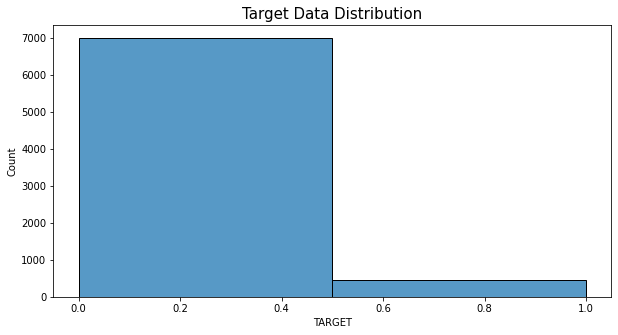

In [ ]:
# Target Data Check
plt.figure(figsize=(10,5))
sns.histplot(train_y, bins=2)
plt.title('Target Data Distribution', fontsize=15)
plt.show()


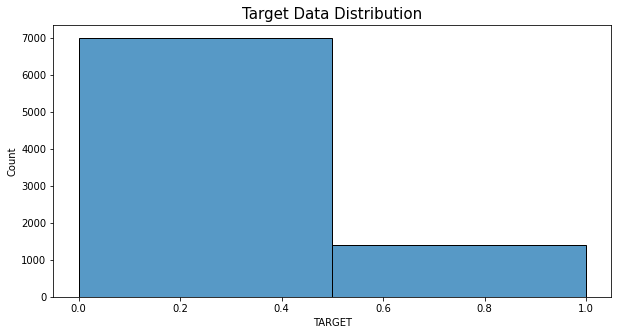

In [ ]:
# Target Data Check
plt.figure(figsize=(10,5))
sns.histplot(new_train_y, bins=2)
plt.title('Target Data Distribution', fontsize=15)
plt.show()

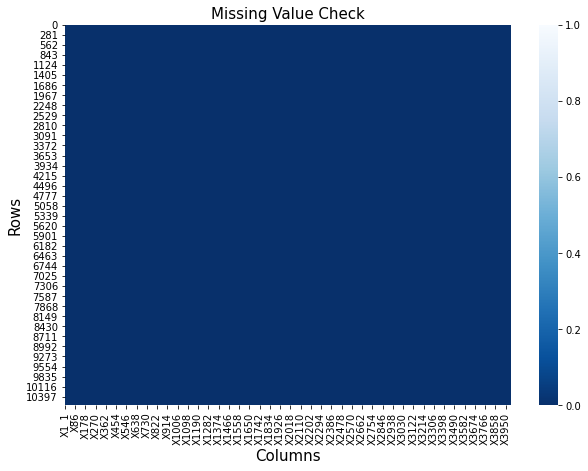

In [ ]:
#Missing Value Check
plt.figure(figsize=(10,7))
sns.heatmap(data.iloc[:, 1:].isnull(), vmax=1, vmin=0, cmap='Blues_r') #Blue = Value / White = Missing value
plt.title('Missing Value Check', fontsize=15)
plt.ylabel('Rows', fontsize=15)
plt.xlabel('Columns', fontsize=15)
plt.show()

#No Missing Value

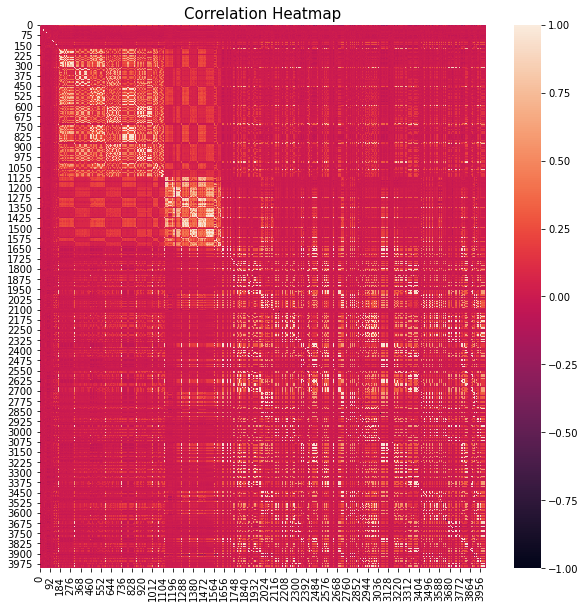

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap', fontsize=15)
sns.heatmap(np.array(correlation), vmin=-1, vmax=1)
plt.show()

#Highly Correlated -> multicolinearity assumption -> Linear Model X

In [ ]:
normal = data[data['TARGET'] == 0]
abnormal = data[data['TARGET']==1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


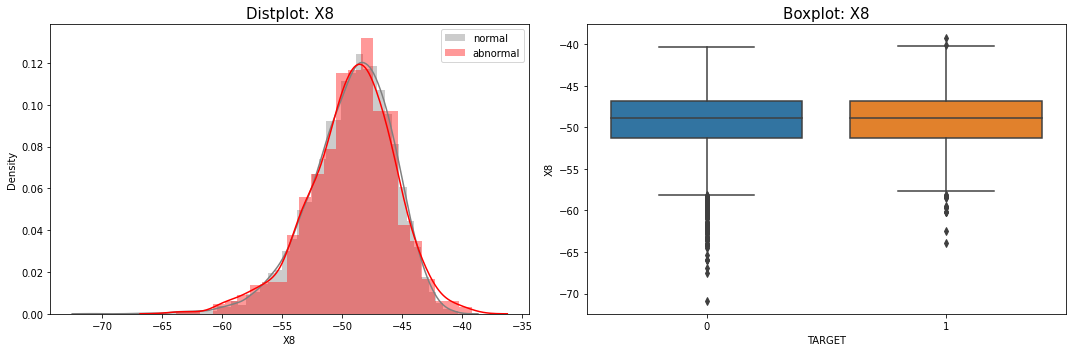

In [ ]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

sns.distplot(normal.X8, label = 'normal', color = 'gray', ax=ax1)
sns.distplot(abnormal.X8, label = 'abnormal', color = 'red', ax=ax1)
ax1.set_title('Distplot: X8', fontsize=15)
ax1.legend()

sns.boxplot(data=data, x='TARGET', y='X8',ax= ax2)
ax2.set_title('Boxplot: X8', fontsize=15)
f.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data_temp = data.copy()
scaler = StandardScaler().fit(data_temp)
data_temp = pd.DataFrame(scaler.transform(data_temp), columns=data_temp.columns)
data_temp = data_temp.iloc[:, 11:]

In [ ]:
temp_normal = data_temp[data['TARGET'] == 0]
temp_abnormal = data_temp[data['TARGET'] == 1]
mean_abnormal = temp_abnormal.mean(axis=0)
mean_normal = temp_normal.mean(axis=0)
dist = mean_abnormal - mean_normal

In [ ]:
top_10_name = abs(dist).sort_values(ascending=False)[:10].index

In [ ]:
list(top_10_name)

['X5', 'X4', 'X893', 'X920', 'X947', 'X990', 'X878', 'X888', 'X670', 'X686']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

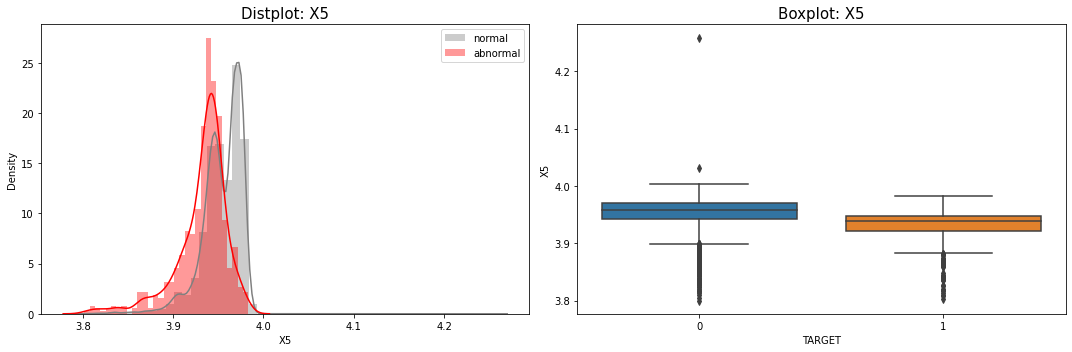

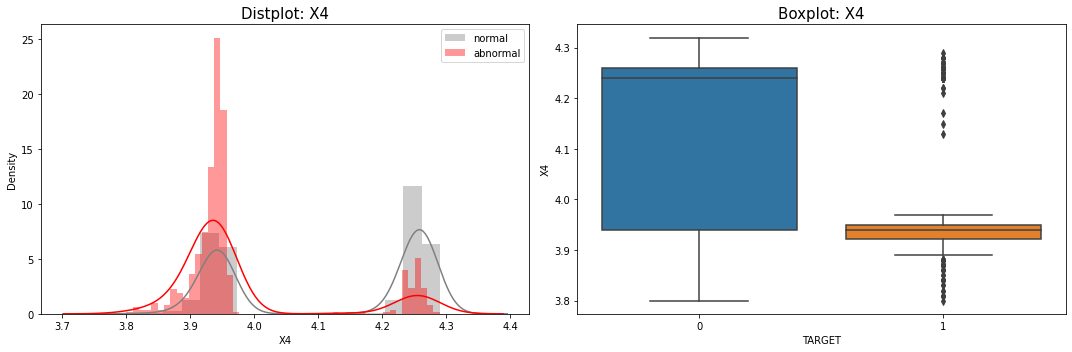

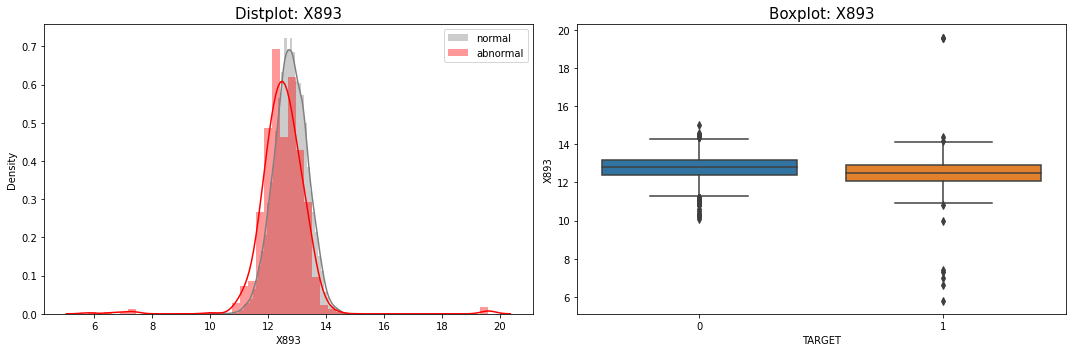

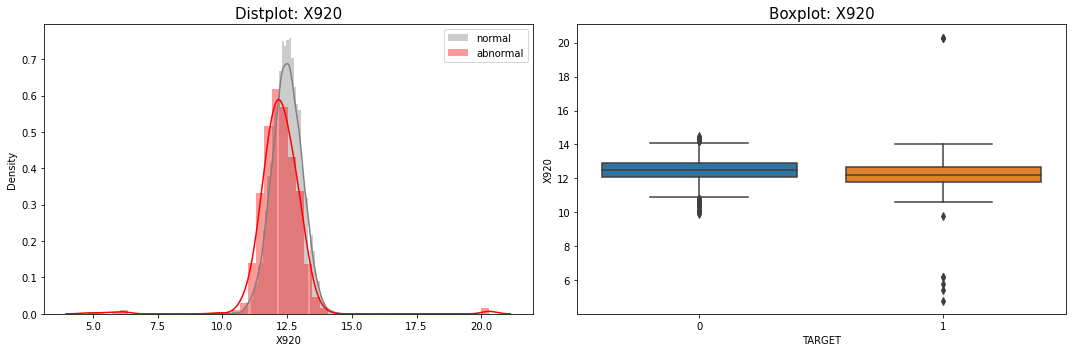

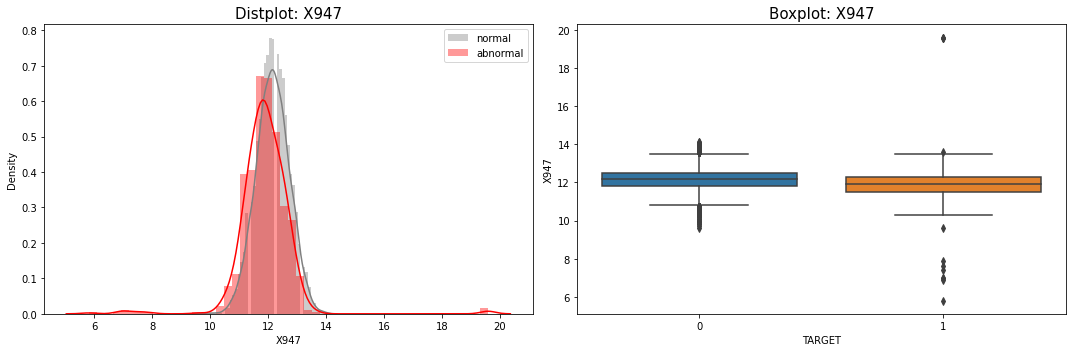

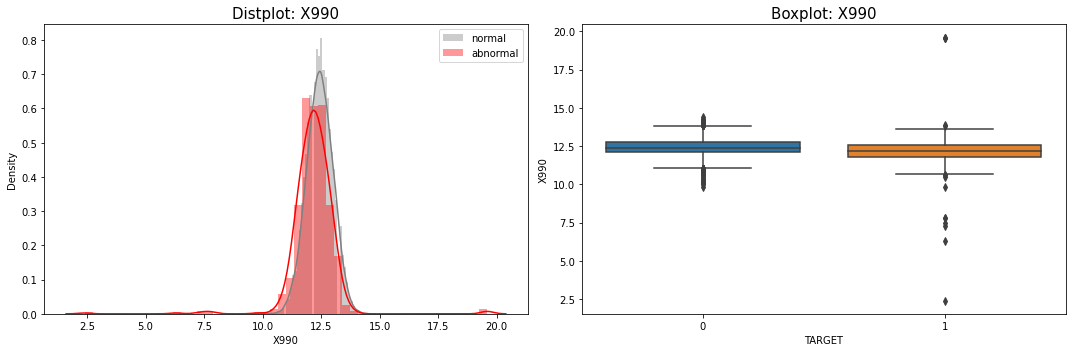

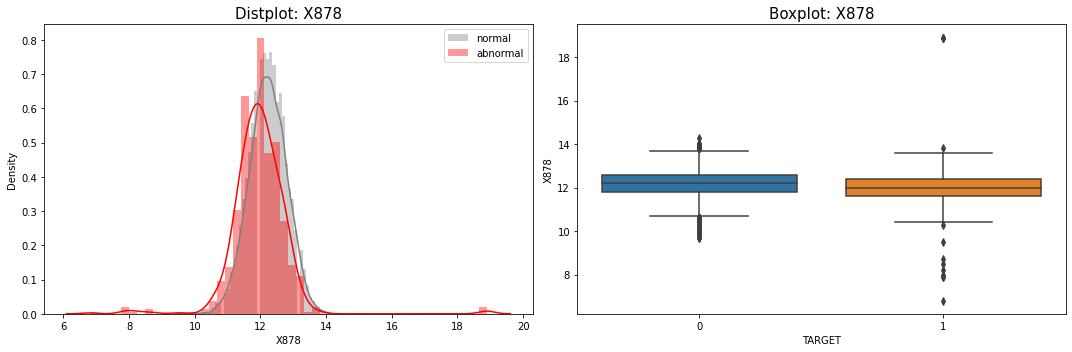

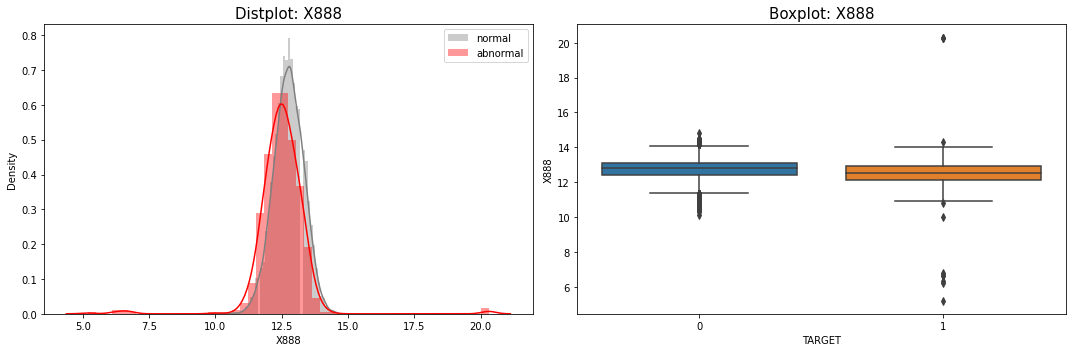

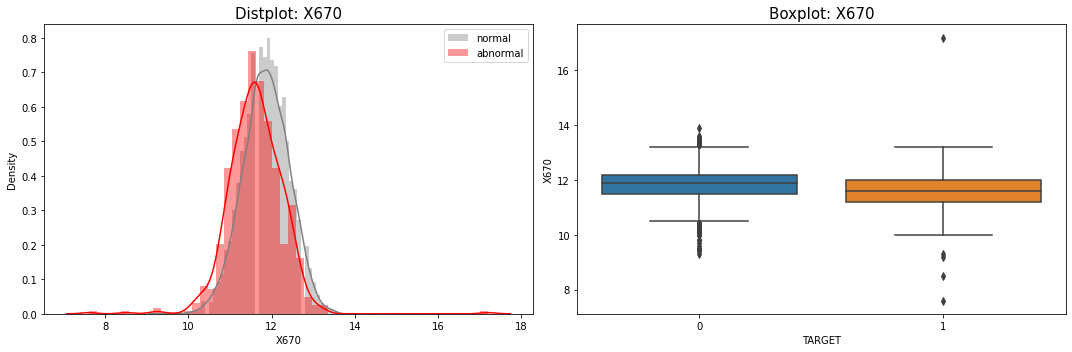

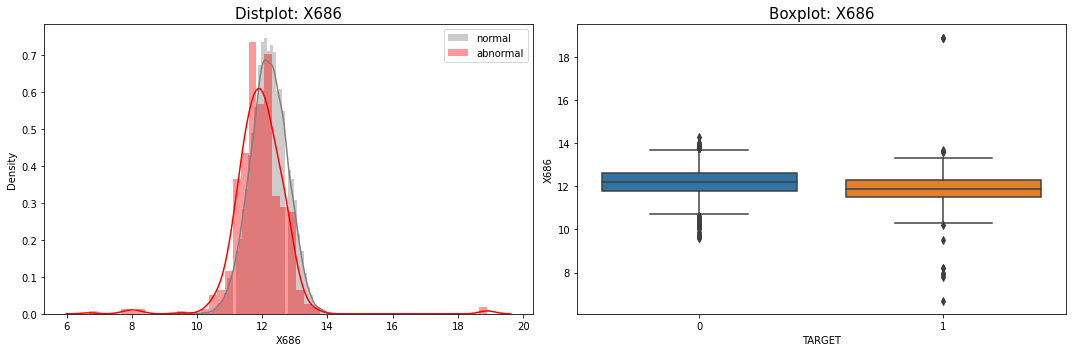

In [ ]:
for varname in list(top_10_name):


  f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

  sns.distplot(normal[varname], label = 'normal', color = 'gray', ax=ax1)
  sns.distplot(abnormal[varname], label = 'abnormal', color = 'red', ax=ax1)
  ax1.set_title(f'Distplot: {varname}', fontsize=15)
  ax1.legend()

  sns.boxplot(data=data, x='TARGET', y=varname,ax= ax2)
  ax2.set_title(f'Boxplot: {varname}', fontsize=15)
  f.tight_layout()

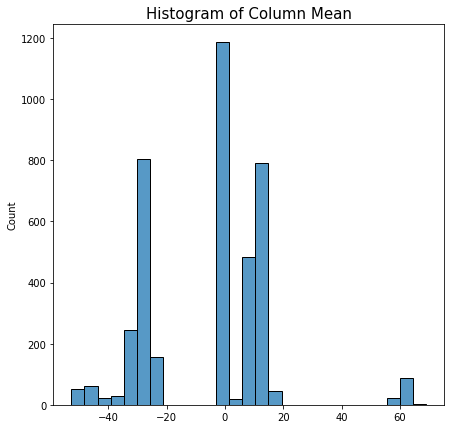

In [ ]:
#Data Scale Check
data_mean = data.mean(axis=0)
plt.figure(figsize=(7,7))
sns.histplot(data_mean)
plt.title('Histogram of Column Mean', fontsize=15)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

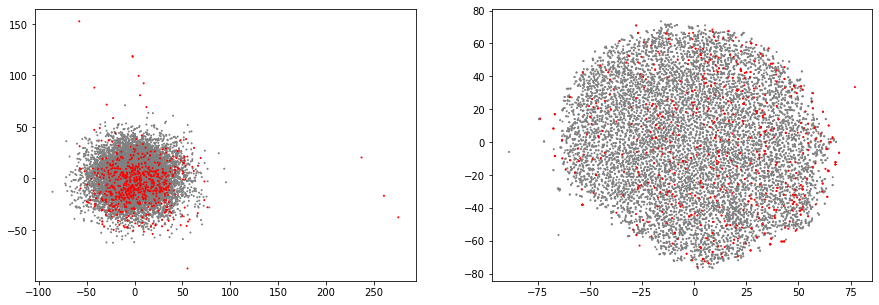

In [ ]:
cmap = ['gray', 'red']
colors = [cmap[x] for x in data['TARGET']]

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_temp)

tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data_temp)

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

ax1.scatter(data_pca[:,0], data_pca[:,1], s = 1, color = colors)
ax2.scatter(data_tsne[:,0], data_tsne[:,1], s = 1, color = colors)

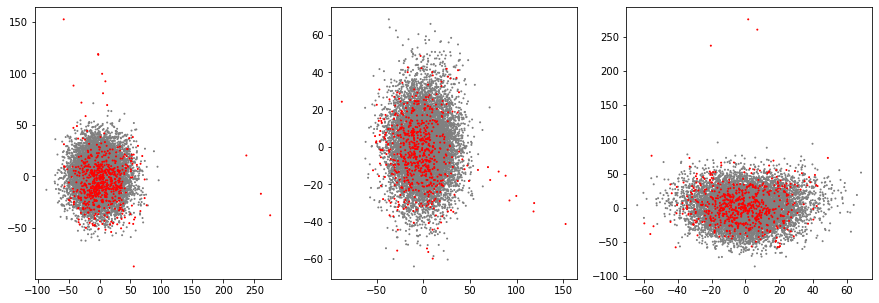

In [ ]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_temp)


f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))

ax1.scatter(data_pca[:,0], data_pca[:,1], s = 1, color = colors)
ax2.scatter(data_pca[:,1], data_pca[:,2], s = 1, color = colors)
ax3.scatter(data_pca[:,2], data_pca[:,0], s = 1, color = colors)